# NAME-ARBAJ SIKANDAR SHAIKH

# Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


# Variable	Description
Age	Age in years

Sex	1 = male; 0 = female

cp|	Chest pain type

trestbps	Resting blood pressure (in mm Hg on admission to the hospital)

chol	Serum cholesterol in mg/dl

fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg	Resting electrocardiographic results

thalach	Maximum heart rate achieved

exang	Exercise induced angina (1 = yes; 0 = no)

oldpeak	ST depression induced by exercise relative to rest

slope	Slope of the peak exercise ST segment

ca	Number of major vessels (0-3) colored by fluoroscopy

thal	3 = normal; 6 = fixed defect; 7 = reversible defect

Target	1 or 0


In [1]:
import pandas as pd
data=pd.read_excel(r"C:\Users\Arbaj\Downloads\1645792390_cep1_dataset.xlsx")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1.	Preliminary analysis:

### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

<AxesSubplot:ylabel='Frequency'>

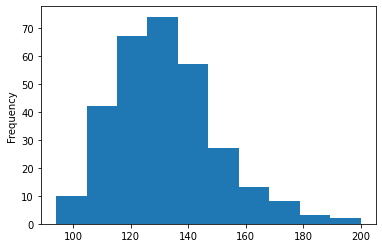

In [2]:
import matplotlib.pyplot as plt
data.trestbps.plot(kind='hist')

C:\Users\Arbaj\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

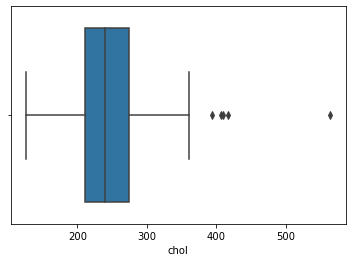

In [3]:
import seaborn as sns
sns.boxplot(data.chol)

<AxesSubplot:ylabel='Frequency'>

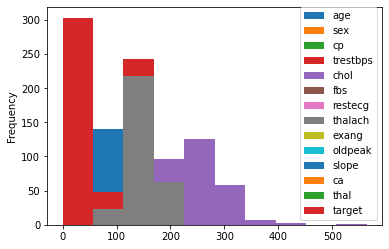

In [4]:
data.plot(kind='hist')

In [5]:
data.isnull().sum().any()

False

the data is right skewed for general purpose we consider the extreme right side is outliers.

### b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [6]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum().any()

False

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

### a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


dataset has 14 columns most of the people's age liew in 40 to 60
data is skewed so extreme max values are play less important role in prediction


### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [10]:
details=[]
categorical=[]
val=[]
for i in data.columns:
    details.append(['%s:'%i,data[i].var(),data[i].std(),data[i].mean()])
    
    if len(data[i].unique())<10:
        categorical.append(['%s'%i,len(data[i].unique())])
        val.append(['%s'%i,data[i].value_counts()])
details

[['age:', 81.8657565290094, 9.047969746247464, 54.420529801324506],
 ['sex:', 0.21755296913159197, 0.466425738067264, 0.6821192052980133],
 ['cp:', 1.0651140788981561, 1.0320436419542325, 0.9635761589403974],
 ['trestbps:', 308.4728168797167, 17.56339423003756, 131.60264900662253],
 ['chol:', 2678.423588039867, 51.75348865574056, 246.5],
 ['fbs:', 0.12722492354403644, 0.3566860293648133, 0.1490066225165563],
 ['restecg:', 0.27670458295747113, 0.5260271694099755, 0.5264900662251656],
 ['thalach:', 524.5715605817252, 22.90352725196984, 149.56953642384107],
 ['exang:', 0.22108424457107573, 0.4701959640097687, 0.32781456953642385],
 ['oldpeak:', 1.3489714197707428, 1.1614522890634564, 1.0430463576158941],
 ['slope:', 0.379793623902664, 0.6162739844441464, 1.3973509933774835],
 ['ca:', 1.0135420562803892, 1.0067482586428393, 0.7185430463576159],
 ['thal:', 0.3758003124243678, 0.6130255397814742, 2.314569536423841],
 ['target:', 0.24897141977074203, 0.49897035961141223, 0.543046357615894]]

In [11]:
data.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [12]:
data.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
data.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
categorical

[['sex', 2],
 ['cp', 4],
 ['fbs', 2],
 ['restecg', 3],
 ['exang', 2],
 ['slope', 3],
 ['ca', 5],
 ['thal', 4],
 ['target', 2]]

these variables are categorical in nature

In [16]:
val

[['sex',
  1    206
  0     96
  Name: sex, dtype: int64],
 ['cp',
  0    143
  2     86
  1     50
  3     23
  Name: cp, dtype: int64],
 ['fbs',
  0    257
  1     45
  Name: fbs, dtype: int64],
 ['restecg',
  1    151
  0    147
  2      4
  Name: restecg, dtype: int64],
 ['exang',
  0    203
  1     99
  Name: exang, dtype: int64],
 ['slope',
  2    141
  1    140
  0     21
  Name: slope, dtype: int64],
 ['ca',
  0    175
  1     65
  2     38
  3     20
  4      4
  Name: ca, dtype: int64],
 ['thal',
  2    165
  3    117
  1     18
  0      2
  Name: thal, dtype: int64],
 ['target',
  1    164
  0    138
  Name: target, dtype: int64]]

In [17]:
data.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

### c.	Study the occurrence of CVD across the Age category

In [18]:
data1=data[data.target==1]

In [19]:
data2=data.sort_values('age',ascending=True)
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [20]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
age30=data2[(data2['age']>=31) & (data2['age']<40)]
age40=data2[(data2['age']>=41) & (data2['age']<50)]
age50=data2[(data2['age']>=51) & (data2['age']<60)]
age60=data2[(data2['age']>=61) & (data2['age']<70)]
age70=data2[(data2['age']>=71) & (data2['age']<80)]

In [22]:
print(age30.target.value_counts()[1]/(age30.target.value_counts()[0]+age30.target.value_counts()[1]))
print(age40.target.value_counts()[1]/(age40.target.value_counts()[0]+age40.target.value_counts()[1]))
print(age50.target.value_counts()[1]/(age50.target.value_counts()[0]+age50.target.value_counts()[1]))
print(age60.target.value_counts()[1]/(age60.target.value_counts()[0]+age60.target.value_counts()[1]))
print(age70.target.value_counts()[1]/(age70.target.value_counts()[0]+age70.target.value_counts()[1]))

0.7142857142857143
0.7101449275362319
0.5169491525423728
0.42028985507246375
0.8333333333333334


the risk is at 30 to 50 age group and after 70 the risk is higher

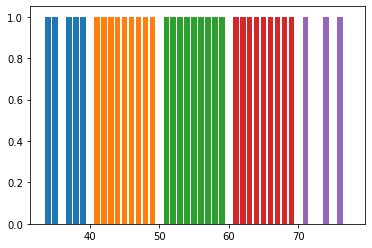

In [23]:
plt.bar(age30.age,age30.target)
plt.bar(age40.age,age40.target)
plt.bar(age50.age,age50.target)
plt.bar(age60.age,age60.target)
plt.bar(age70.age,age70.target)
plt.show()

(20.0, 85.0)

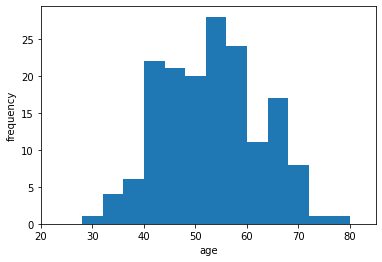

In [24]:
import numpy as np
plt.hist(data1.age,bins=np.arange(0,100,4))

plt.xlabel('age')
plt.ylabel('frequency')
plt.xlim(20,85)

### d.	Study the composition of all patients with respect to the Sex category

In [25]:
m=data[(data.sex==1) & (data.target==1)]
f=data[(data.sex==0) & (data.target==1)]

In [26]:
m.shape[0]

92

In [27]:
data[data.sex==1].shape

(206, 14)

In [28]:
print({'male':m.shape[0]/data[data.sex==1].shape[0],
      'female':f.shape[0]/data[data.sex==0].shape[0]})

{'male': 0.44660194174757284, 'female': 0.75}


the statistics says that 75% of women have CVD. it is 30% more than male

### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [29]:
data.corr().trestbps.target

-0.1462686638415544

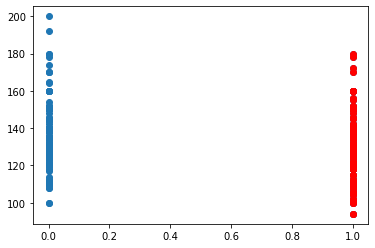

In [30]:
plt.scatter(data.target,data.trestbps)
plt.scatter(data1.target,data1.trestbps,c='r')
#plt.ylim(0,120)

In [31]:
data.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

Text(0.5, 0, 'patient')

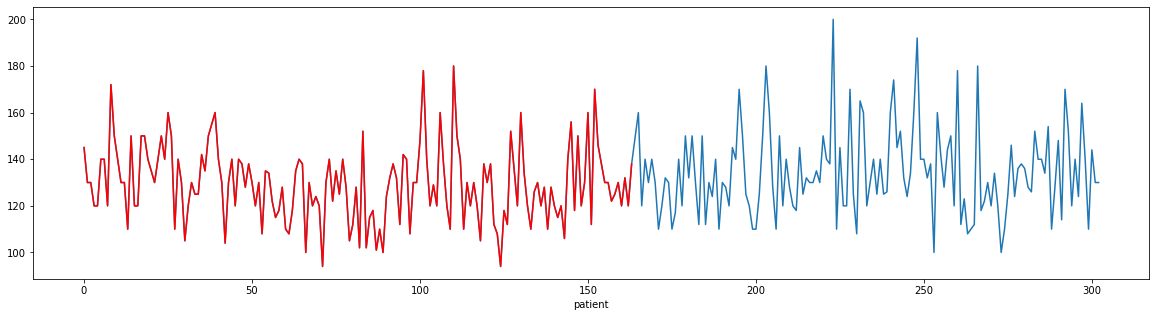

In [32]:
plt.figure(figsize=(20,5))
data.trestbps.plot()
data1.trestbps.plot(c='r')
plt.xlabel('patient')

assuraly we cant say anything about CVD on basis of trestbps

### f.	Describe the relationship between cholesterol levels and a target variable

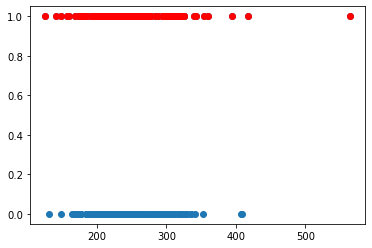

In [33]:
plt.scatter(data.chol,data.target)
plt.scatter(data1.chol,data1.target,c='r')

In [34]:
data.chol.corr(data.target)

-0.08143720051844144

<AxesSubplot:>

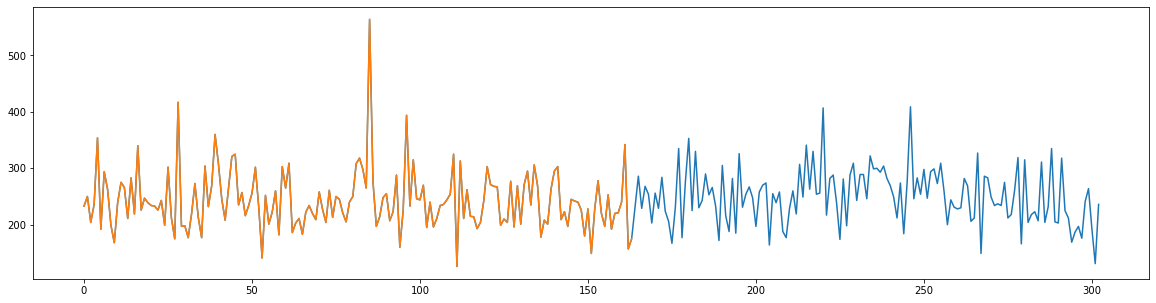

In [35]:
plt.figure(figsize=(20,5))
data.chol.plot()
data1.chol.plot()

assuraly we cant say anything about CVD on basis of cholesterol 

### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

In [36]:
data.oldpeak.unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [37]:
data.target.corr(data.oldpeak)

-0.429145832886738

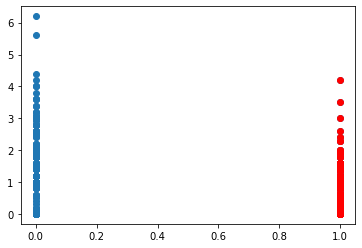

In [38]:
plt.scatter(data.target,data.oldpeak)
plt.scatter(data1.target,data1.oldpeak,c='r')

<AxesSubplot:>

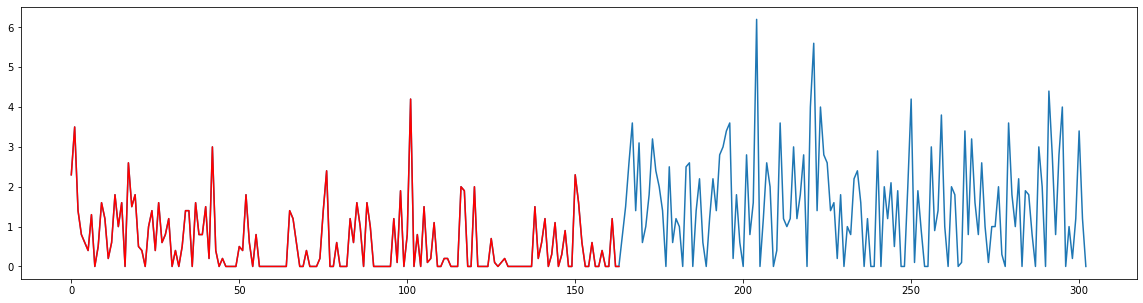

In [39]:
plt.figure(figsize=(20,5))
data.oldpeak.plot()
data1.oldpeak.plot(c='r')

lower the oldpeak will impact and have dengerous effect on health lead to CVD.

### h.	Check if thalassemia is a major cause of CVD

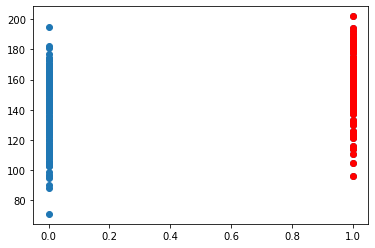

In [40]:
plt.scatter(data.target,data.thalach)
plt.scatter(data1.target,data1.thalach,c='r')

In [41]:
data.thalach.corr(data.target)

0.41995504366386993

<AxesSubplot:>

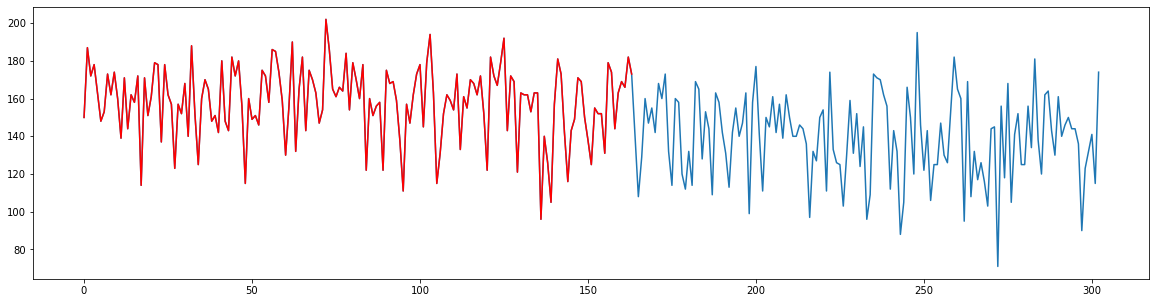

In [42]:
plt.figure(figsize=(20,5))
data.thalach.plot()
data1.thalach.plot(c='r')

higher thalassemia affect the patient health in dengerous way that cause CVD

### i.	List how the other factors determine the occurrence of CVD

In [43]:
a=pd.DataFrame(data.corr()['target'])
a.sort_values(['target'],ascending=False)

,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trestbps,-0.146269
age,-0.221476
sex,-0.283609


### j.	Use a pair plot to understand the relationship between all the given variables

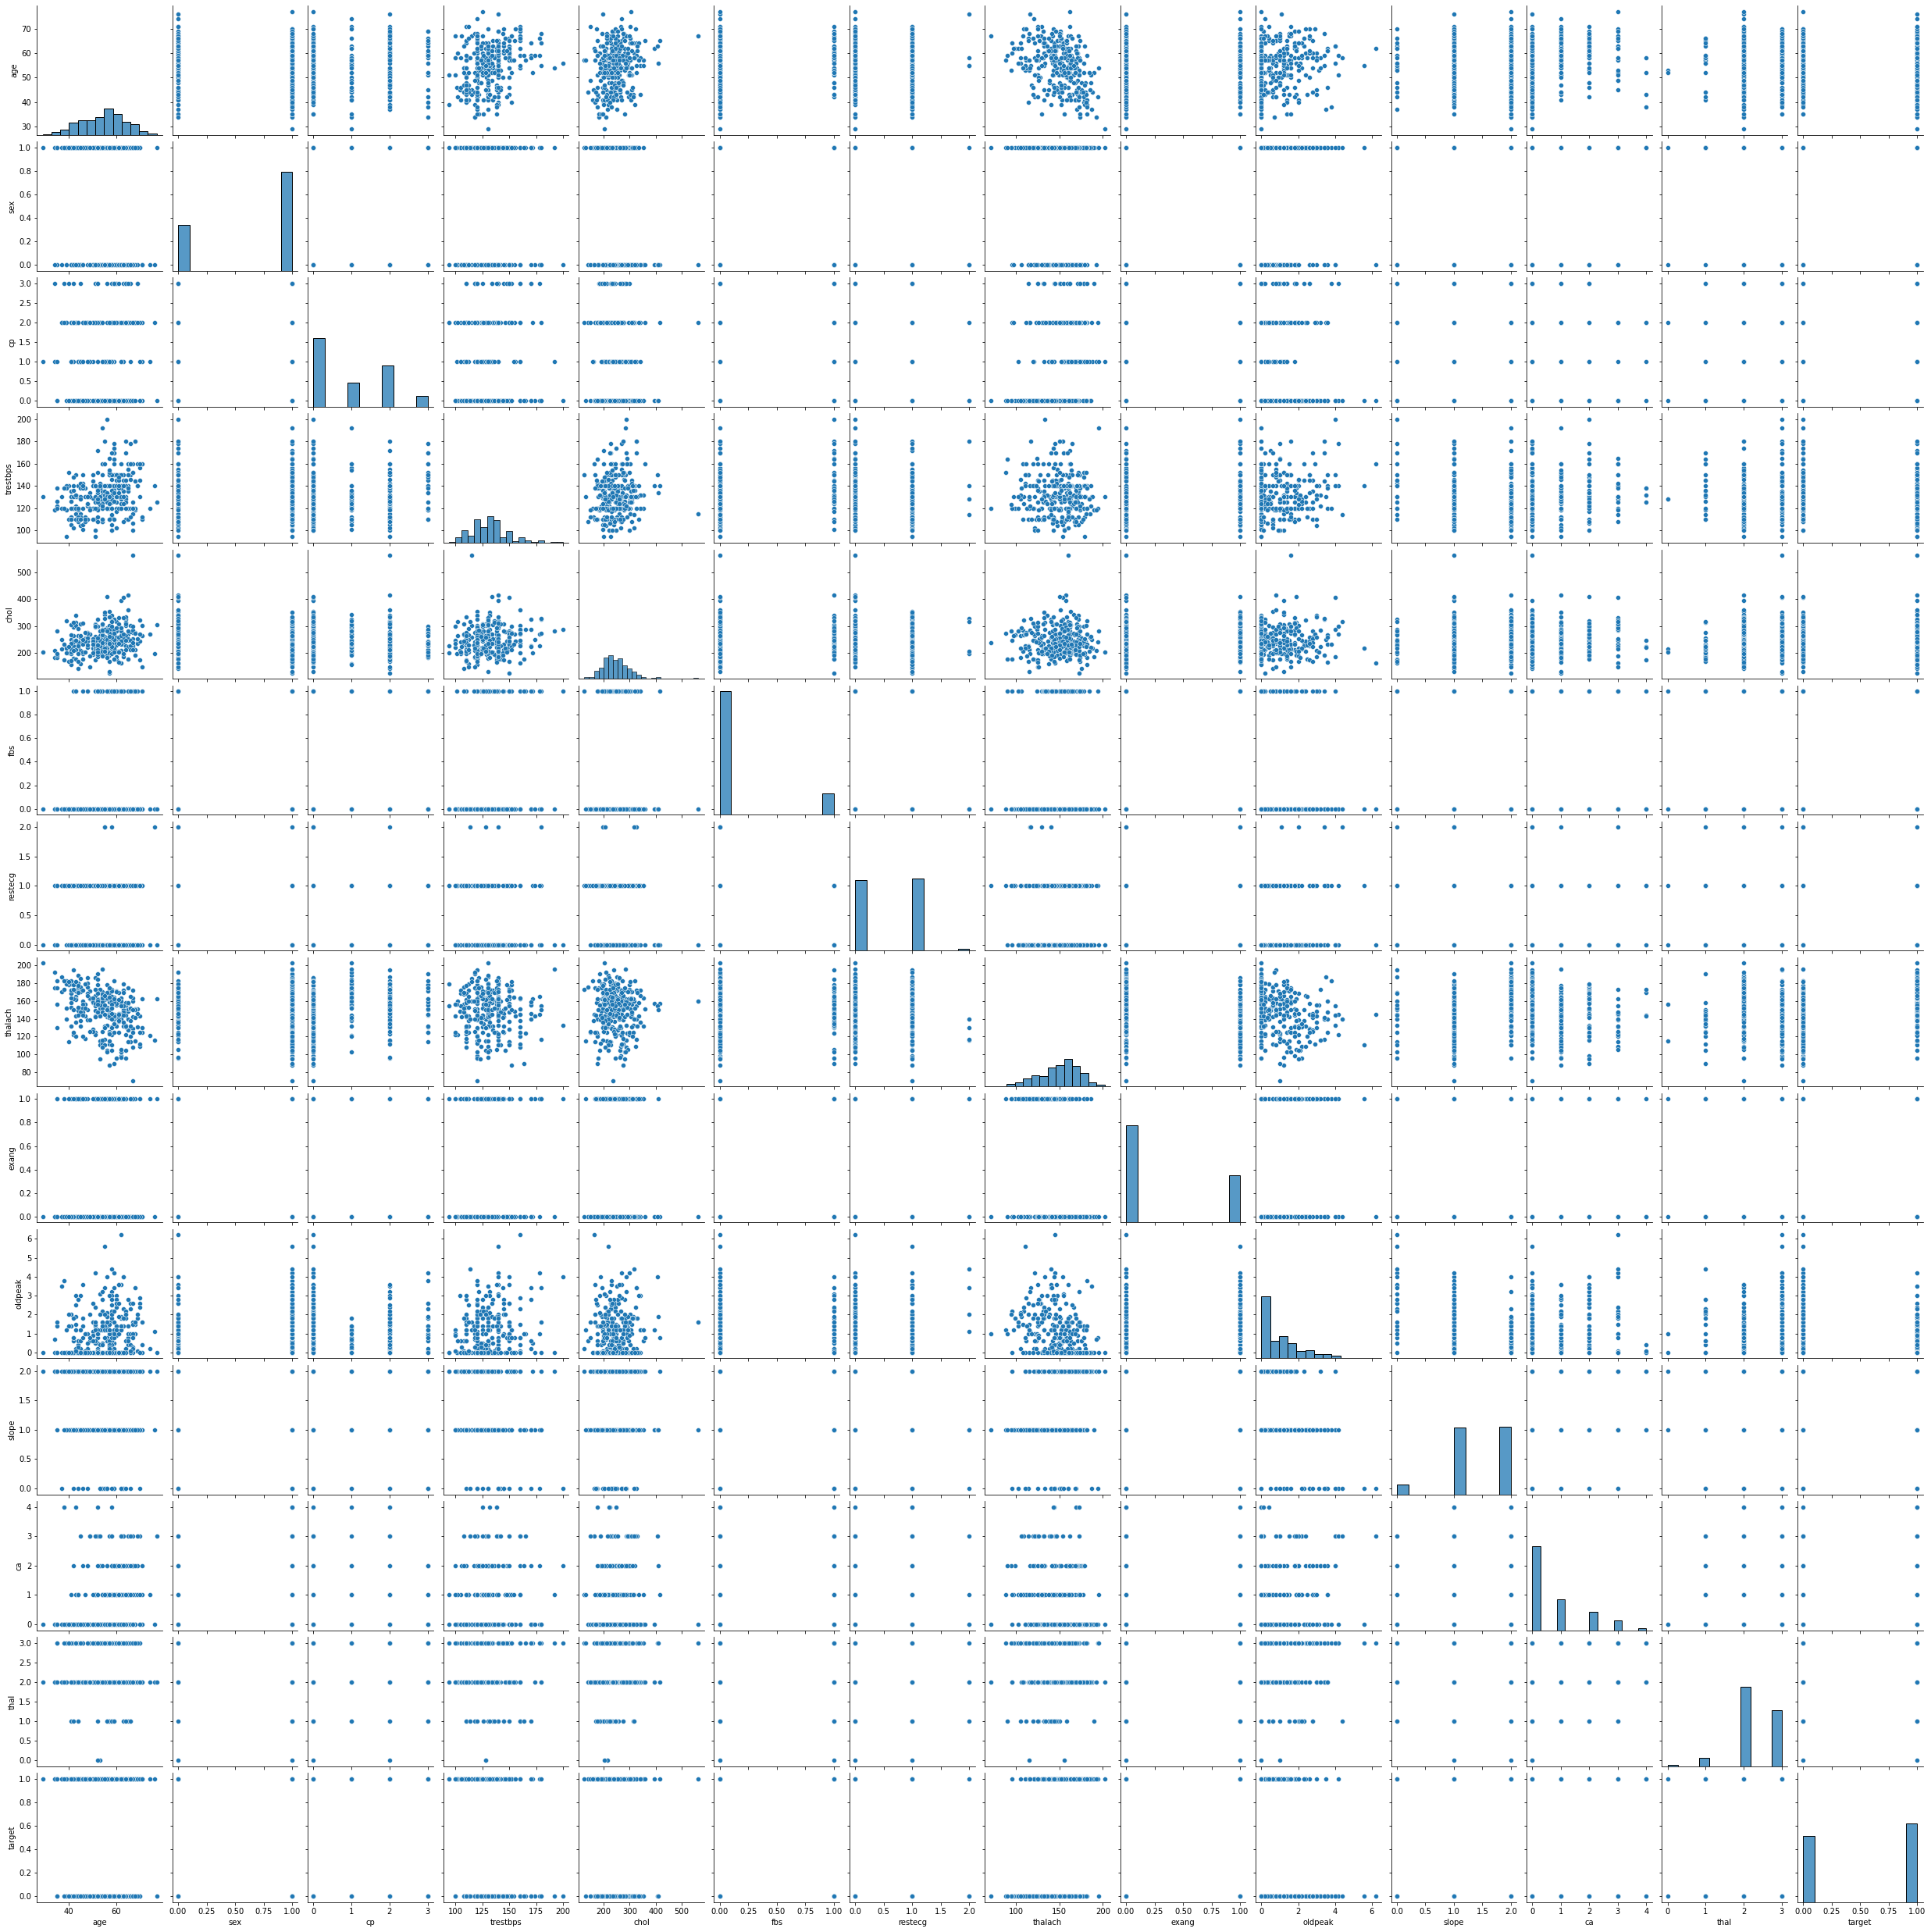

In [44]:
sns.pairplot(data)

# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [45]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [46]:
X=data.iloc[:,:-1]

In [47]:
y=data.iloc[:,-1]

In [48]:
X.shape

(302, 13)

In [49]:
y.shape

(302,)

In [50]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
st=StandardScaler()

In [53]:
categorical

[['sex', 2],
 ['cp', 4],
 ['fbs', 2],
 ['restecg', 3],
 ['exang', 2],
 ['slope', 3],
 ['ca', 5],
 ['thal', 4],
 ['target', 2]]

In [54]:
#data['sex1']=pd.get_dummies(data.sex,drop_first=True)
#data.drop(columns='sex1',inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
st.fit_transform(data[['trestbps','age','chol','thalach']])

array([[ 0.76406571,  0.94979429, -0.26128493,  0.01882584],
       [-0.09140084, -1.92854796,  0.06774054,  1.63697881],
       [-0.09140084, -1.48572607, -0.82256367,  0.98097085],
       ...,
       [ 0.70703461,  1.50332164, -1.0354625 , -0.37477894],
       [-0.09140084,  0.28556146, -2.23543773, -1.51185941],
       [-0.09140084,  0.28556146, -0.20322161,  1.06843858]])

In [56]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=65)

In [58]:
for i in ['trestbps','age','chol','thalach']:
    X_train[i]=st.fit_transform(X_train[[i]])

In [59]:
for i in ['trestbps','age','chol','thalach']:
    X_test[i]=st.transform(X_test[[i]])

C:\Users\Arbaj\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- trestbps
Feature names seen at fit time, yet now missing:
- thalach

  warnings.warn(message, FutureWarning)
C:\Users\Arbaj\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
Feature names seen at fit time, yet now missing:
- thalach

  warnings.warn(message, FutureWarning)
C:\Users\Arbaj\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- chol
Feature names seen at fit time, yet now missing:
-

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [61]:
model=[]
model.append(('LR',LogisticRegression()))
model.append(('RF',RandomForestClassifier()))

In [62]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
result=[]
names=[]
res=[]
for i,j in model:
    kfold=StratifiedKFold(n_splits=10)
    cross=cross_val_score(j,X_train,y_train,cv=kfold,scoring='accuracy')
    result.append(cross)
    names.append(i)
    res.append(cross.mean())
    print('%s: %f (%f)'%(i,cross.mean(),cross.std()))


LR: 0.828947 (0.097120)
RF: 0.839766 (0.094430)


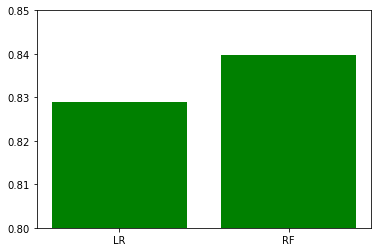

In [63]:
plt.ylim(0.800,0.850)    
plt.bar(names,res,color='green')
plt.show()

In [64]:
result

[array([0.78947368, 0.94444444, 0.83333333, 0.77777778, 0.77777778,
        1.        , 0.88888889, 0.88888889, 0.72222222, 0.66666667]),
 array([0.84210526, 0.94444444, 0.83333333, 0.88888889, 0.77777778,
        1.        , 0.83333333, 0.88888889, 0.72222222, 0.66666667])]

In [65]:
LR=LogisticRegression()

In [66]:
from sklearn.model_selection import GridSearchCV
params={'penalty':('l1','l2','elasticnet'),'C':(np.arange(1,10)),'max_iter':[100,200,500,1000]}

In [67]:
model=GridSearchCV(LR,param_grid=params,cv=10)

In [68]:
model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [69]:
model.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [70]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [71]:
model.score(X_test,y_test)

0.8099173553719008

In [72]:
model.score(X_train,y_train)

0.850828729281768

In [73]:
pred=model.predict(X_test)
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.8099173553719008

Text(33.0, 0.5, 'actual')

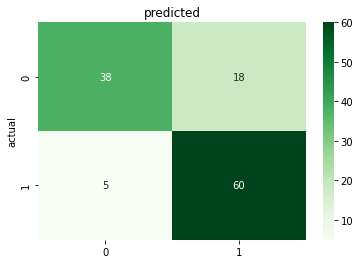

In [75]:

sns.heatmap(confusion_matrix(y_test,pred),fmt='d',annot=True, cmap = "Greens")
plt.title('predicted')
plt.ylabel('actual')

In [76]:
pred1=model.predict(X_train)

Text(33.0, 0.5, 'actual')

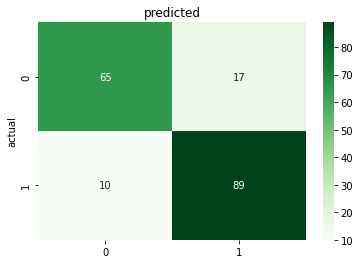

In [77]:
sns.heatmap(confusion_matrix(y_train,pred1),fmt='d',annot=True, cmap = "Greens")
plt.title('predicted')
plt.ylabel('actual')

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        56
           1       0.77      0.92      0.84        65

    accuracy                           0.81       121
   macro avg       0.83      0.80      0.80       121
weighted avg       0.82      0.81      0.81       121



# In this case we have to focus on detecting patients CVD hit ratio so we have to increase and give more priority to RECALL(1) 
# And here the recall is 92% so the model works pretty well.